<a href="https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/unconstrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/unconstrained.ipynb)

In [1]:
import sys
import os

! git clone https://github.com/Arif-PhyChem/MLQD.git

Cloning into 'MLQD'...
remote: Enumerating objects: 1028, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 1028 (delta 151), reused 219 (delta 103), pack-reused 724 (from 1)
Receiving objects: 100% (1028/1028), 35.00 MiB | 1.07 MiB/s, done.
Resolving deltas: 100% (443/443), done.


In [2]:
# install the required packages

! pip install tensorflow --upgrade
! pip install sklearn
! pip install hyperopt

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Add MLQD's path to system path

mlqd_dir='MLQD/dev_ver'
sys.path.append(mlqd_dir)

from evolution import quant_dyn



In [5]:
# get training and test data files from github
! git clone https://github.com/Arif-PhyChem/trace_conservation.git

Cloning into 'trace_conservation'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 110 (from 1)
Receiving objects: 100% (111/111), 200.69 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# Unconstrained NN
In the case of unconstrained NN---a single, multi-output CNN is designed to learn all RDM elements, incorporating a loss function that aggregates errors across all states (sites):

\begin{equation}
    \mathcal{L}_\text{multi} =  \sum_{n=1}^N \mathcal{L}_{nn}.
\end{equation}

where
\begin{equation}
    \mathcal{L}_{nn} =  \sum_{m=1}^M \left(\bar{\tilde{\rho}}_{{\rm S},nn,m} - \tilde{\rho}_{{\rm S},nn,m} \right)^2,
\end{equation}

with $\bar{\tilde{\rho}}_{{\rm S},nn}$ as NN-predicted values and $\tilde{\rho}_{{\rm S},nn}$ as the reference counterpart. Furthermore, $M$ is the number of training points and $m$ is the index of a training point.

However, despite being exposed to the dynamics of all states, this solution still exhibits minor but noticeable trace violations.

To facilitate the training process, we provide pre-prepared training files named 'x.npy' and 'y.npy'. However, if you wish to create your own training files, you can utilize the MLQD tool, available on GitHub at https://github.com/Arif-PhyChem/MLQD, in conjunction with the SB dataset from the QD3SET-1 database, which can be accessed via the DOI link https://doi.org/10.25452/figshare.plus.c.6389553

## Unconstrained CNN model for SB model with MLQD

For quick run, we are setting training epochs 'TrEpochs' to 10, you should set it to a higher number for better training



In [6]:
# sb training files (x and y) for unconstrained NN
! ls trace_conservation/training_data/sb/unconstrained

x.npy  y.npy


In [7]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD
param={
    'n_states': 2,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'trace_conservation/training_data/sb/unconstrained/x',  # str: (Optional) The prepared X file
      'YfileIn': 'trace_conservation/training_data/sb/unconstrained/y',  # str: (Optional) The prepared Y file
      'hyperParam': 'False',  # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'SB'
      }
quant_dyn(**param)



MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Directory trained_models created sucessfully where the trained models will be saved
Epoch 1/10

Epoch 1: val_loss improved from inf to 0.00266, saving model to trained_models/cnn_model-01-tloss-2.185e-02-vloss-2.655e-03.keras
90/90 - 10s - 108ms/step - loss: 0.0218 - val_loss: 0.0027
Epoch 2/10

Epoch 2: val_loss improved from 0.00266 to 0.00046, saving model to trained_models/cnn_model-02-tloss-1.131e-03-vloss-4.594e-04.keras
90/90 - 3s - 28ms/step - loss: 0.0011 - val_loss: 4.5939e-04
Epoch 3/10

Epoch 3: val_loss improved from 0.00046 to 0.00012, saving model to trained_models/cnn_model-03-tloss-2.433e-04-vloss-1.236e-04.keras
90/90 - 0s - 5ms/step - loss: 2.4330e-04 - val_loss: 1.2357e-04
Epoch 4/10

Epoch 4: val_loss improved from 0.00012 to 0.00008, saving model to trained_models/cnn_model-04-tloss-1.082e-04-vloss-8.092e-05.keras
90/90 - 0s - 5ms/step - loss: 1.0815e-04 - val_loss: 8.0917e-05
Epoch 5/10

Epoch 5: val_loss improved from 0.00008 to 0.00006, saving model to trained_

## Test for a test trajectory.

In [8]:
# test tarjectory
! ls trace_conservation/test_data/sb/

2_epsilon-0.0_Delta-1.0_lambda-0.6_gamma-9.0_beta-1.0.npy


In [26]:
# Here we are using MLQD for dynamics prediction, later we will calculate the
xx = np.load('trace_conservation/test_data/sb/2_epsilon-0.0_Delta-1.0_lambda-0.6_gamma-9.0_beta-1.0.npy')
x = xx[0:41,1:]

param={
    'n_states': 2,
    'time': 10,
    'ostl_steps': 20,
      'QDmodel': 'useQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'XfileIn': x,           # str: (Optional) The prepared X file will be saved at the provided file name
    'gamma': 9.0,
    'lamb': 0.6,
    'temp': 1.0,
      'cons_trace': 'False',
      'systemType': 'SB', # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO)
      'QDmodelIn':  'trained_models/cnn_model-08-tloss-4.559e-05-vloss-4.555e-05.keras',    # str: (Optional), providing a name to save the model at
      'QDtrajOut': 'unconstrained_sb_traj'  # predicted trajectory will be saved with this name
      }
quant_dyn(**param)


MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 165, 80)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 165, 110)            │          26,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 165, 80)             │          26,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 82, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         209,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,806 (1.06 MB)

 Trainable params: 277,806 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

ml_dyn.RCDYN: Running recursive dynamics with CNN model......
ml_dyn.RCDYN: Dynamics is saved in a file  "unconstrained_sb_traj"
ml_dyn.RCDYN: Time taken = 0.6454775333404541 sec
No reference trajectory was provided, so dynamics is not plotted. You can provide reference trajectory with "refTraj"
MLQD is ended at 2024-08-29 08:08:23.128181


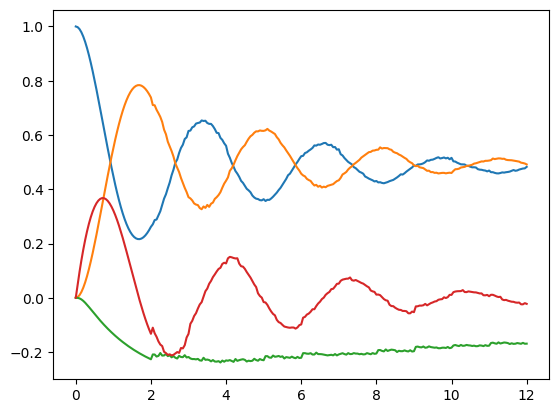

In [33]:
# Plot elements of rho
x = np.load('unconstrained_sb_traj.npy')

plt.plot(x[:,0], x[:, 1]) # Population of state_1
plt.plot(x[:,0], x[:, 4])  # Population of state_1
plt.plot(x[:,0], np.real(x[:, 2])) # Real part of coherent term r_12
plt.plot(x[:,0], np.imag(x[:, 2])) # Real part of coherent term r_21

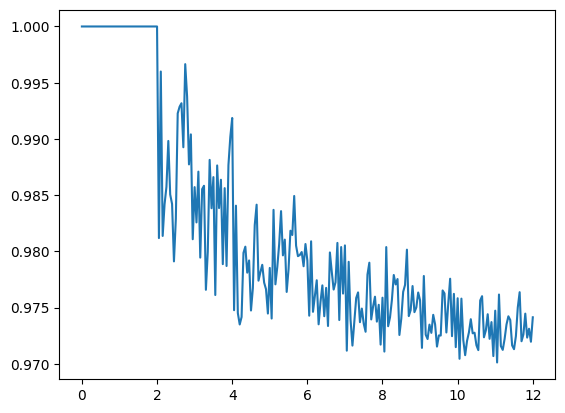

In [35]:
# Plot trace vs time
x = np.load('unconstrained_sb_traj.npy')
trace = np.real(x[:,1] + x[:,4])

plt.plot(x[:,0], trace)

# Let's do it for FMO complex

In [17]:
## As the datasize for FMO complex is quite large, we have provided at Zenodo
! wget --content-disposition https://zenodo.org/records/13446756/files/training_data.zip?download=1

--2024-08-29 07:57:31--  https://zenodo.org/records/13446756/files/training_data.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380879719 (363M) [application/octet-stream]
Saving to: ‘training_data.zip’

training_data.zip   100%[===================>] 363.23M  2.81MB/s    in 5m 46s  

2024-08-29 08:03:18 (1.05 MB/s) - ‘training_data.zip’ saved [380879719/380879719]



In [18]:
! unzip training_data

Archive:  training_data.zip
   creating: training_data/
   creating: training_data/fmo/
   creating: training_data/fmo/hc_pinn/
  inflating: training_data/fmo/hc_pinn/x.npy  
  inflating: training_data/fmo/hc_pinn/y01.npy  
   creating: training_data/fmo/physics_agnostic/
   creating: training_data/fmo/physics_agnostic/site_1/
  inflating: training_data/fmo/physics_agnostic/site_1/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_1/y.npy  
   creating: training_data/fmo/physics_agnostic/site_2/
  inflating: training_data/fmo/physics_agnostic/site_2/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_2/y.npy  
   creating: training_data/fmo/physics_agnostic/site_3/
  inflating: training_data/fmo/physics_agnostic/site_3/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_3/y.npy  
   creating: training_data/fmo/physics_agnostic/site_4/
  inflating: training_data/fmo/physics_agnostic/site_4/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_4/y.npy  

In [19]:
!ls

MLQD		sample_data	    trained_models  training_data.zip
norm_const.pkl	trace_conservation  training_data   unconstrained_sb_traj.npy


In [20]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD

param={
    'n_states': 7,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'training_data/fmo/unconstrained/x',           # str: (Optional) The prepared X file
      'YfileIn': 'training_data/fmo/unconstrained/y',           # str: (Optional) The prepared Y file
      'hyperParam': 'False',           # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'patience': 30,
      'OptEpochs': 30,
      'ostl_steps': 20,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'FMO',
      'QDmodelOut': 'unconstrained_fmo_model'    # str: (Optional), providing a name to save the model at
      }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Directory trained_models already exists where the trained models will be saved
Epoch 1/10

Epoch 1: val_loss improved from inf to 0.00004, saving model to trained_models/cnn_model-01-tloss-1.103e-03-vloss-3.773e-05.keras
105/105 - 10s - 95ms/step - loss: 0.0011 - val_loss: 3.7726e-05
Epoch 2/10

Epoch 2: val_loss improved from 0.00004 to 0.00002, saving model to trained_models/cnn_model-02-tloss-2.957e-05-vloss-1.876e-05.keras
105/105 - 7s - 62ms/step - loss: 2.9573e-05 - val_loss: 1.8756e-05
Epoch 3/10

Epoch 3: val_loss improved from 0.00002 to 0.00001, saving model to trained_models/cnn_model-03-tloss-1.587e-05-vloss-1.118e-05.keras
105/105 - 5s - 49ms/step - loss: 1.5871e-05 - val_loss: 1.1181e-05
Epoch 4/10

Epoch 4: val_loss improved from 0.00001 to 0.00001, saving model to trained_models/cnn_model-04-tloss-9.666e-06-vloss-9.538e-06.keras
105/105 - 5s - 49ms/step - loss: 9.6658e-06 - val_loss: 9.5383e-06
Epoch 5/10

Epoch 5: val_loss improved from 0.00001 to 0.00001, saving model

In [24]:
xx = np.load('trace_conservation/test_data/fmo/7_initial-1_gamma-400.0_lambda-40.0_temp-90.0.npy')

x = xx[0:41,1:]

param={
        'n_states': 7,
        'time': 2,
        'time_step' : 0.005,
        'ostl_steps': 20,
        'QDmodel': 'useQDmodel',     # str: create QD model. The dafault option is useQDmodel
        'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
        'XfileIn': x,           # str: (Optional) The prepared X file will be saved at the provided file name
        'gamma': 400,
        'lamb': 40,
        'temp': 90,
        'cons_trace': 'False',
        'systemType': 'FMO', # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO)
        'QDmodelIn': 'trained_models/cnn_model-10-tloss-3.990e-06-vloss-4.008e-06.keras',    # str: (Optional), providing a name to save the model at
        'QDtrajOut': 'unconstrained_fmo_traj'  # predicted trajectory will be saved with this name
      }
quant_dyn(**param)


MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 2010, 80)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 2010, 110)           │          26,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2010, 80)            │          26,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1005, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │       2,572,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 980)                 │         126,420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,756,786 (10.52 MB)

 Trainable params: 2,756,786 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

ml_dyn.RCDYN: Running recursive dynamics with CNN model......
ml_dyn.RCDYN: Dynamics is saved in a file  "unconstrained_fmo_traj"
ml_dyn.RCDYN: Time taken = 1.108325719833374 sec
No reference trajectory was provided, so dynamics is not plotted. You can provide reference trajectory with "refTraj"
MLQD is ended at 2024-08-29 08:07:24.385450


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


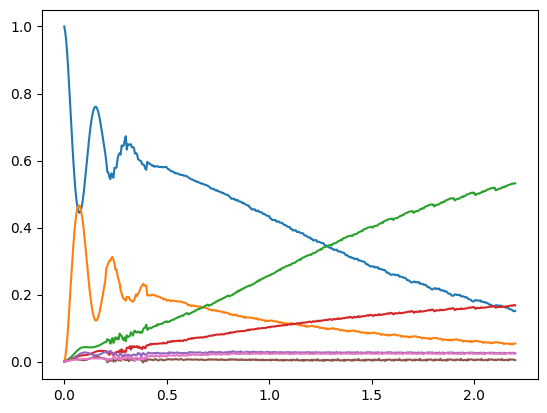

In [38]:
# Plotting diagonal terms of rho
x = np.load('unconstrained_fmo_traj.npy')

for i in [1, 9, 17, 25, 33, 41, 49]:
  plt.plot(x[:,0], x[:, i])


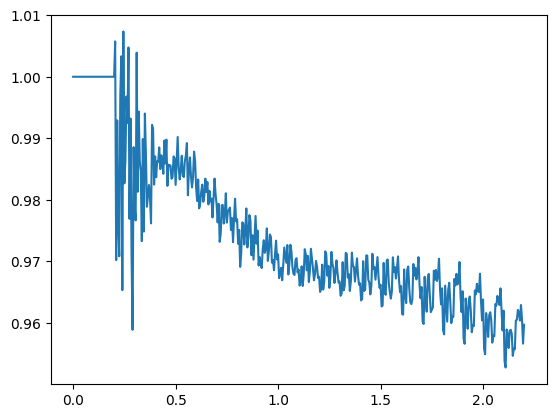

In [39]:
# Plot trace vs time

x = np.load('unconstrained_fmo_traj.npy')
trace = np.real(x[:,1] + x[:,9] + x[:,17] + x[:,25] + x[:,33] + x[:, 41] + x[:,49])

plt.plot(x[:,0], trace)